# **Results: Asymmetric homophily stress-test**

Our code for running the homophily experiments was largely adapted from the following GitHub repository: https://github.com/gesiscss/Homophilic_Directed_ScaleFree_Networks/tree/master

In [1]:
from helpers.utils import print_graph_statistics
from helpers.plots import add_h_edge_to_results
from helpers.plots import plot_three_heatmaps_compact
from helpers.plots import build_plotting_df_from_results
from helpers.plots import plot_violin
from helpers.plots import plot_eight_heatmaps_compact
from helpers.plots import plot_zscores_with_hedge_bottom
from helpers.plots import plot_zscores_with_homophily_rows

## **Import the data**

In [2]:
split_path_dpah = "../data/splits/dpah/"
csv_out_dpah = f"../data/output/dpah/dpah_edge_distributions.csv"
output_folder = "../data/output/"

Print graph statistics

In [3]:
print_graph_statistics(csv_out_dpah)

Dataset                     | Nodes | Avg Degree | Gradients/Epoch | Global π counts (00) | (01) | (11) | Global π dist. (00)  | (01)                   | (11)                   | Train π counts (00) | (01) | (11) | Train π dist. (00)   | (01)                 | (11)                   | Valid π counts (00) | (01) | (11) | Valid π dist. (00)   | (01)                 | (11)                  | Test π counts (00) | (01) | (11) | Test π dist. (00)    | (01)                  | (11)                  | Train pos/neg overlap | Valid pos/neg overlap | Test pos/neg overlap
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Training**

The command below (which is commented out) makes a DPAH graph for each combination of parameters. Calling the main MORAL file will create edge splits using get_datasets(), as demonstrated above. These pos/neg edge datasets are similar to the original datasets used in the MORAL paper (but not equal, given the underspecification in their methods).

In [4]:
# ! python3 main.py --fair_model dpah --model gae --device cuda:0 --epochs 500

## **Load stored results**

In [5]:
from helpers.metrics import get_results, print_results

Splits from the generated graphs for the hyperparameter combinations are saved under ``split_path_dpah``. We calculate the fairness and utility metrics for each graph.

Below are the parameters used for training.

In [6]:
N = 1000
fm_values = [0.05, 0.10, 0.2,0.3,0.4,0.5] # fraction of minorities
d = 0.006  # desired edge density
plo_M = 2.5 # power-law outdegree distribution majority class
plo_m = 2.5 # power-law outdegree distribution minority class
h_MM_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # homophily among majorities
h_mm_values = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0] # homophily among minorities
feature_dim_DPAH = 16 # gaussian feature vectors
DPAH_seed = 42
k = 1000

Now load the results (this can take a few minutes)

In [7]:
datasets = []
for fm in fm_values:
    for h_MM in h_MM_values:
        for h_mm in h_mm_values:
            datasets.append(f'dpah_fm{fm:.2f}_hMM{h_MM:.2f}_hmm{h_mm:.2f}')

#! This can take a few minutes to run! 
results = get_results(
    datasets = datasets,
    folder = output_folder,
    splits_dir = split_path_dpah,
    graph_stats_csv = csv_out_dpah,
    model_string = "_DPAH_GAE",
    k = k,
)

print_results(results, k)

Dataset                     | Raw NDKL@1000   | Reranked NDKL@1000 | Raw AWRF@1000   | Reranked AWRF@1000 | Raw DP          | Reranked DP     | Precision@1000  | NDCG@1000      
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
dpah_fm0.05_hMM0.00_hmm0.00 | 0.0000 ± 0.0000 | 0.0000 ± 0.0000    | 0.0000 ± 0.0000 | 0.0000 ± 0.0000    | nan ± nan       | nan ± nan       | 0.7693 ± 0.0069 | 0.9852 ± 0.0021
dpah_fm0.05_hMM0.00_hmm0.10 | 0.0089 ± 0.0067 | 0.0013 ± 0.0000    | 0.0137 ± 0.0064 | 0.0010 ± 0.0000    | 0.0711 ± 0.0202 | 0.0557 ± 0.0216 | 0.7317 ± 0.0082 | 0.9807 ± 0.0023
dpah_fm0.05_hMM0.00_hmm0.20 | 0.0169 ± 0.0110 | 0.0015 ± 0.0000    | 0.0194 ± 0.0193 | 0.0002 ± 0.0000    | 0.0515 ± 0.0149 | 0.0644 ± 0.0377 | 0.7263 ± 0.0154 | 0.9781 ± 0.0033
dpah_fm0.05_hMM0.00_hmm0.30 | 0.0113 ± 0.0089 | 0.0016 ± 0.0000    | 0.0167 ± 0.0123 | 0.0003 ± 0.0000    | 0.

Add absolute homophily $h_\mathrm{edge}$ to the results dictionary

In [8]:
print(type(results))
results = add_h_edge_to_results(csv_out_dpah, results)

<class 'dict'>


In [ ]:
# import new font
import matplotlib as mpl
mpl.rcParams.update({
    "text.usetex": True, # LaTeX compiler; comment out for faster rendering
    "font.family" : "serif",
    "font.serif" : ["Latin Modern Roman"],
    "mathtext.fontset" : "cm",
    "axes.labelsize" : 11,
    "font.size" : 11,
    "xtick.labelsize" : 10,
    "ytick.labelsize" : 10,
})

In [14]:
df = build_plotting_df_from_results(
    results,
    k = 1000,
    prefix = "reranked"
)

print(df.head())
print(df.describe())

                       dataset  ndkl_mean  ndkl_std   dp_mean    dp_std  \
0  dpah_fm0.05_hMM0.00_hmm0.00   0.000000       0.0       NaN       NaN   
1  dpah_fm0.05_hMM0.00_hmm0.10   0.001270       0.0  0.055670  0.021578   
2  dpah_fm0.05_hMM0.00_hmm0.20   0.001544       0.0  0.064419  0.037736   
3  dpah_fm0.05_hMM0.00_hmm0.30   0.001605       0.0  0.051108  0.034791   
4  dpah_fm0.05_hMM0.00_hmm0.40   0.001668       0.0  0.067780  0.022407   

   hat_pi00  hat_pi01  hat_pi11  rho    log_rho  delta_intra  
0       0.0     1.000     0.000  0.0 -27.631021        0.000  
1       0.0     0.984     0.016  0.0 -27.631021        0.016  
2       0.0     0.971     0.029  0.0 -27.631021        0.029  
3       0.0     0.968     0.032  0.0 -27.631021        0.032  
4       0.0     0.965     0.035  0.0 -27.631021        0.035  
        ndkl_mean      ndkl_std     dp_mean      dp_std    hat_pi00  \
count  726.000000  7.260000e+02  714.000000  714.000000  726.000000   
mean     0.005052  1.084202e-

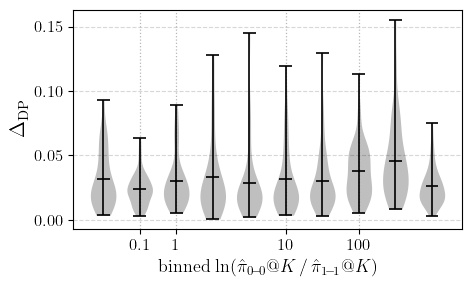

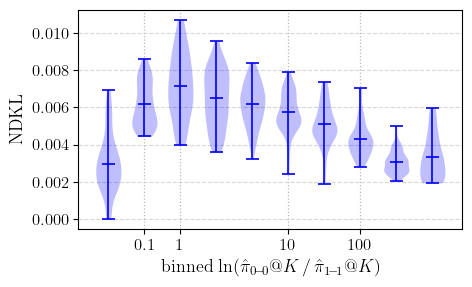

In [15]:
plot_violin(
    df,
    y = "dp_mean",
    y_label = r"$\Delta_\mathrm{DP}$",
    color = "black",
    n_bins = 10,
    ratio_ticks = (0.01, 0.1, 1, 10, 100),
    # savepath = "dp_violin_by_logrho.pdf",
)

plot_violin(
    df,
    y = "ndkl_mean",
    y_label = r"$\mathrm{NDKL}$",
    color = "blue",
    n_bins = 10,
    ratio_ticks = (0.01, 0.1, 1, 10, 100),
    # savepath = "ndkl_violin_by_logrho.pdf",
)

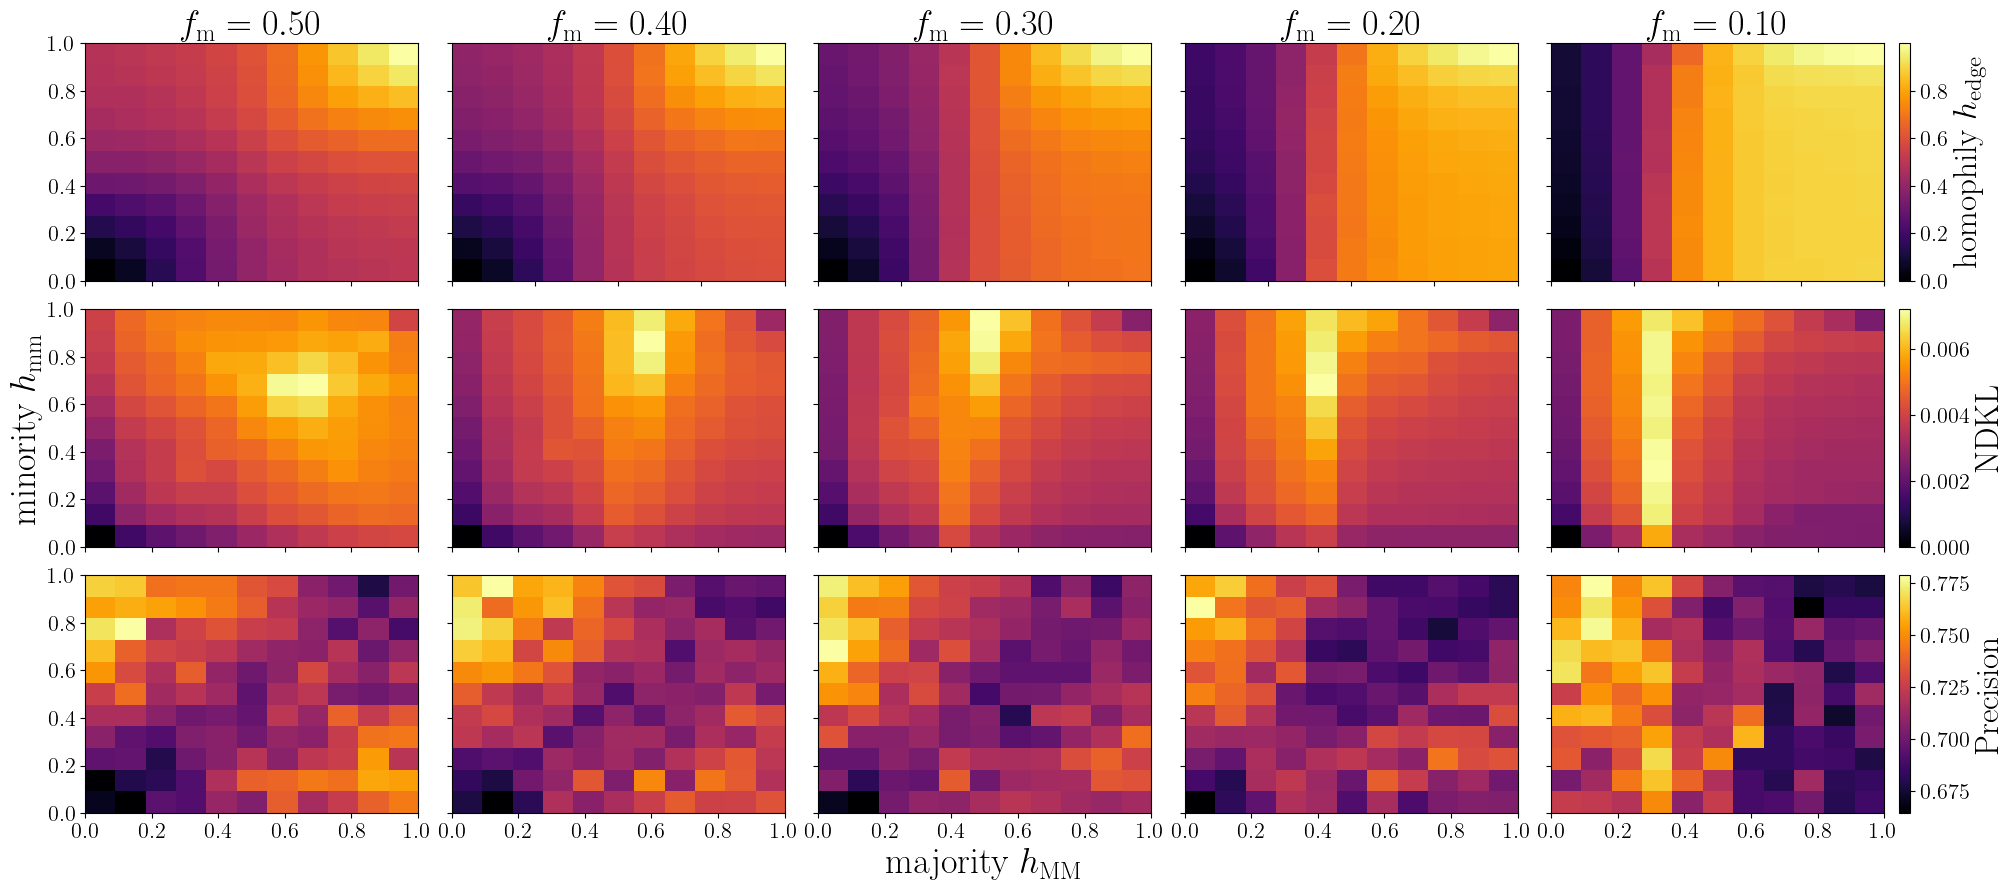

In [16]:
fm_plot = sorted(fm_values[1:], reverse = True)

plot_three_heatmaps_compact(
    results,
    fm_plot,
    h_MM_values,
    h_mm_values,
    metric_top = "h_edge",
    label_top = rf"homophily $h_\mathrm{{edge}}$",
    metric_mid = "reranked_NDKL",
    label_mid = rf"$\mathrm{{NDKL}}$",
    metric_bottom = "precision_at_k",
    label_bottom = rf"$\mathrm{{Precision}}$",
    fs = 16,
    savepath = "../figures/dpah_heatmap_h_edge_ndkl_precision.pdf",
)

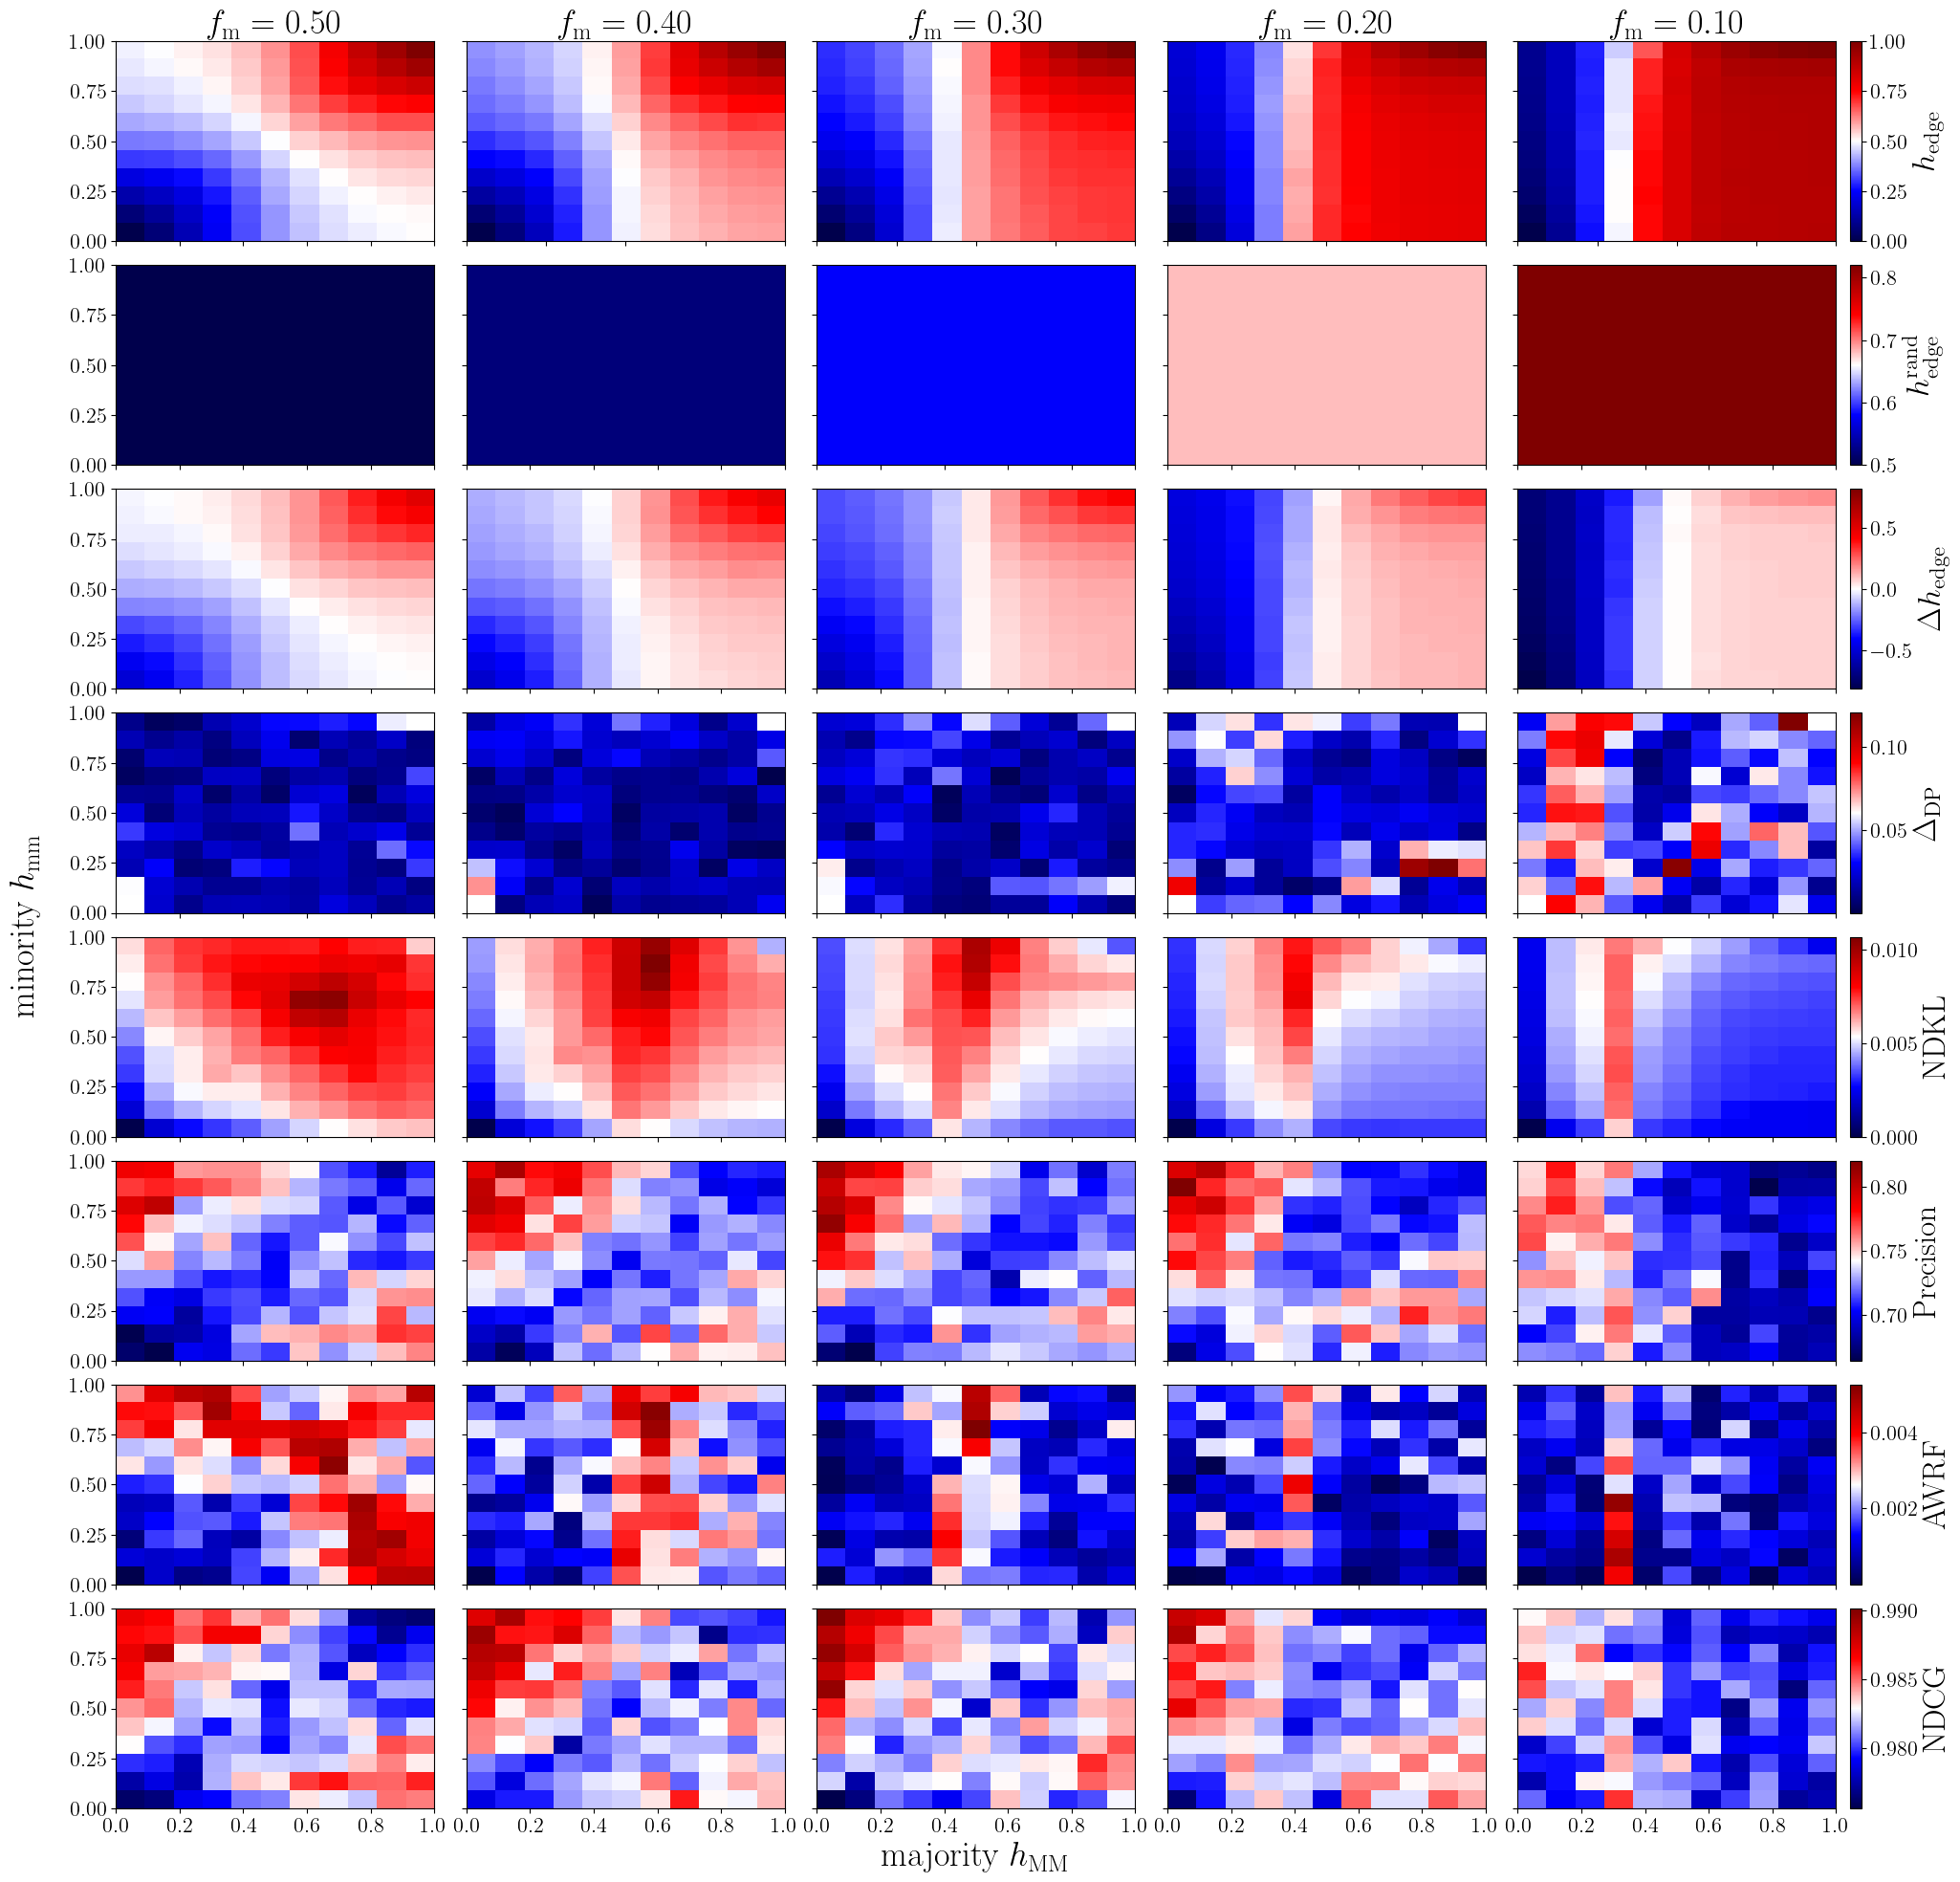

In [17]:
plot_eight_heatmaps_compact(
    results,
    sorted(fm_values[1:], reverse = True),
    h_MM_values,
    h_mm_values,
    fs=16,
    savepath="../figures/dpah_heatmap_8rows_seismic.pdf",
)

c:\Users\vwold\Documents\UvA\13_FACT\FACT-AI\scripts\helpers\plots.py:1010: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


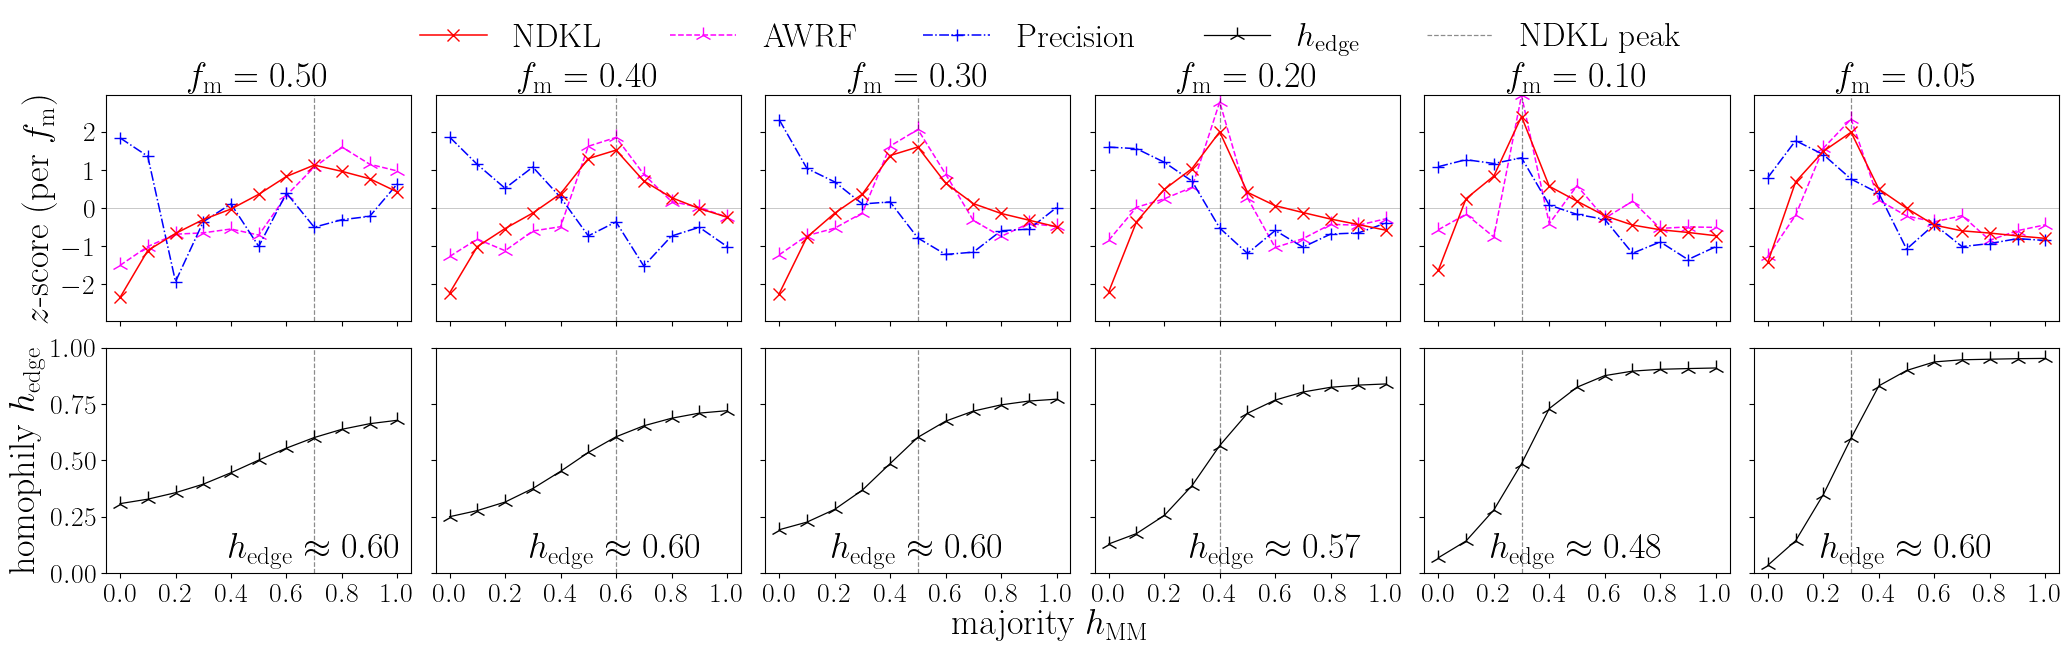

In [18]:
plot_zscores_with_hedge_bottom(
    results,
    sorted(fm_values, reverse = True),
    h_MM_values,
    h_mm_values,
    fs = 20,
    savepath = "../figures/dpah_zscores_top_hedge_bottom_ndkl_peaks_bigfont_awrf.pdf",
)

c:\Users\vwold\Documents\UvA\13_FACT\FACT-AI\scripts\helpers\plots.py:1216: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


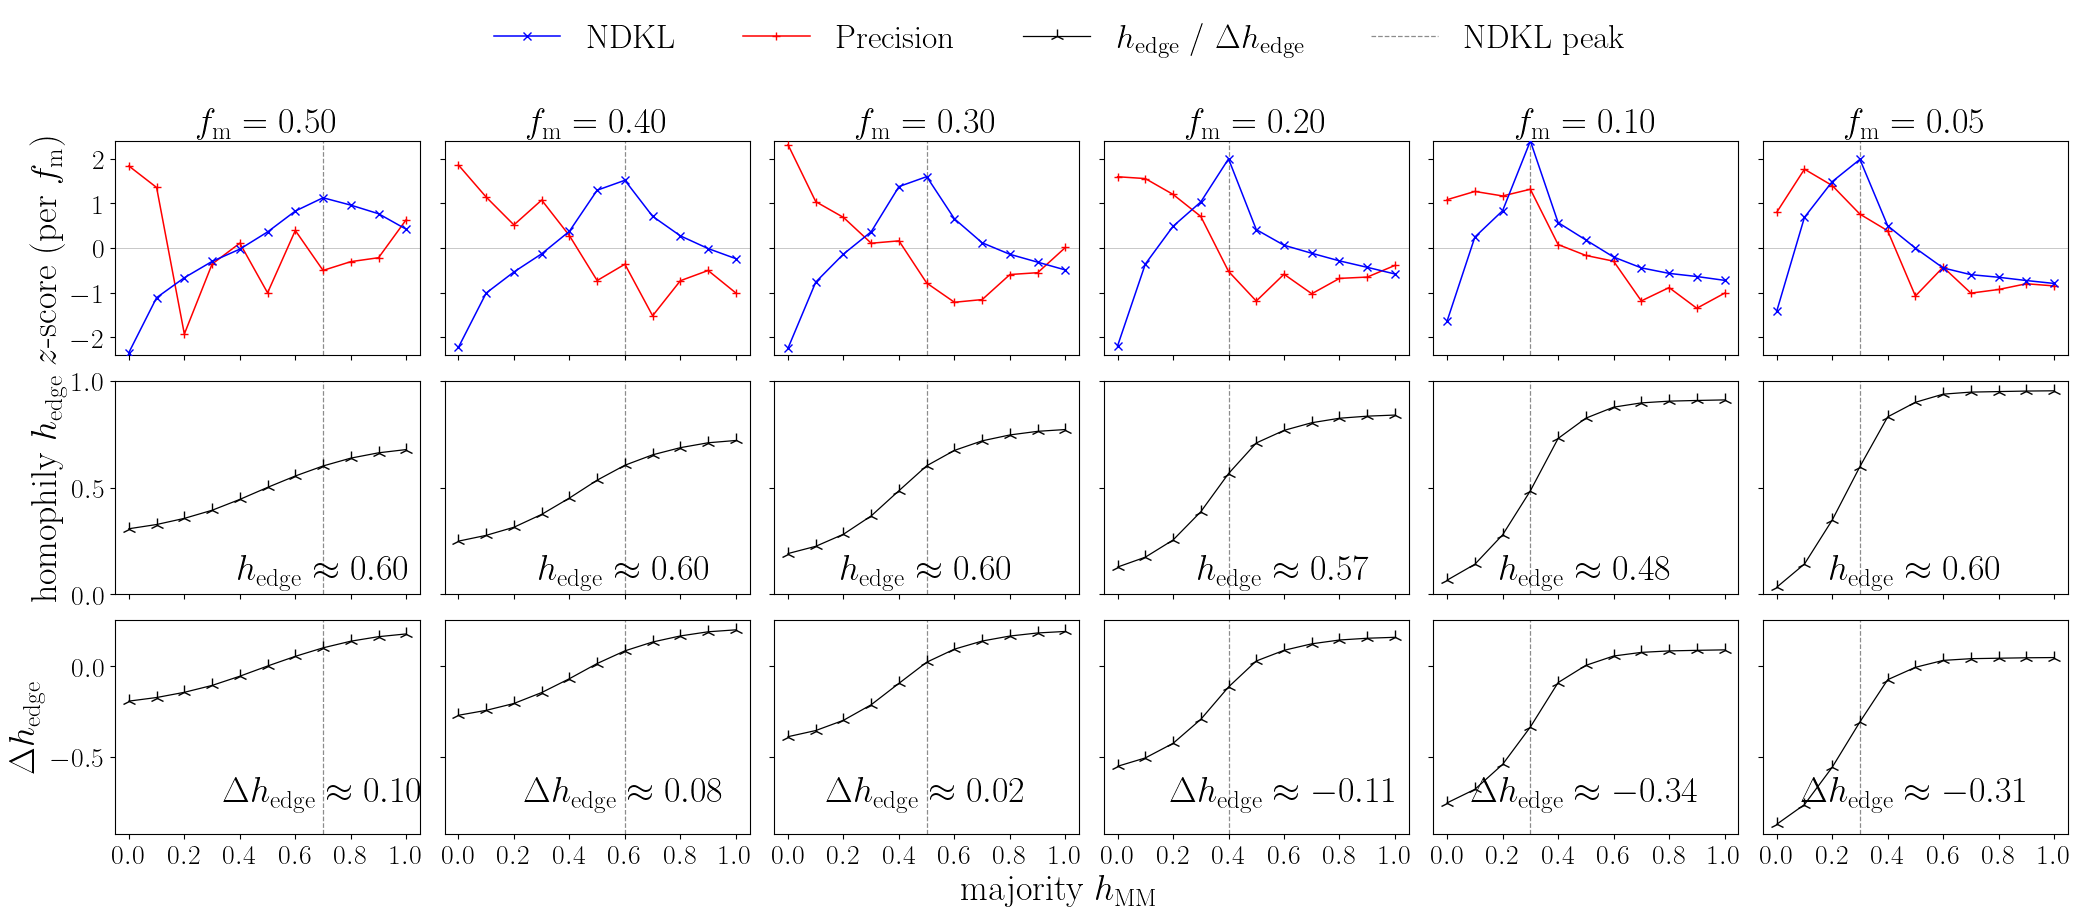

In [19]:
plot_zscores_with_homophily_rows(
    results = results,
    fm_values = sorted(fm_values, reverse=True),
    h_MM_values = h_MM_values,
    h_mm_values = h_mm_values,
    fs = 20,
    key_ndkl = "reranked_NDKL",
    key_prec = "precision_at_k",
    key_hedge = "h_edge",
    key_delta = "delta_h_edge",
    # savepath = "../figures/dpah_zscores_ndkl_precision_h_edge_delta_h_edge.pdf",
)

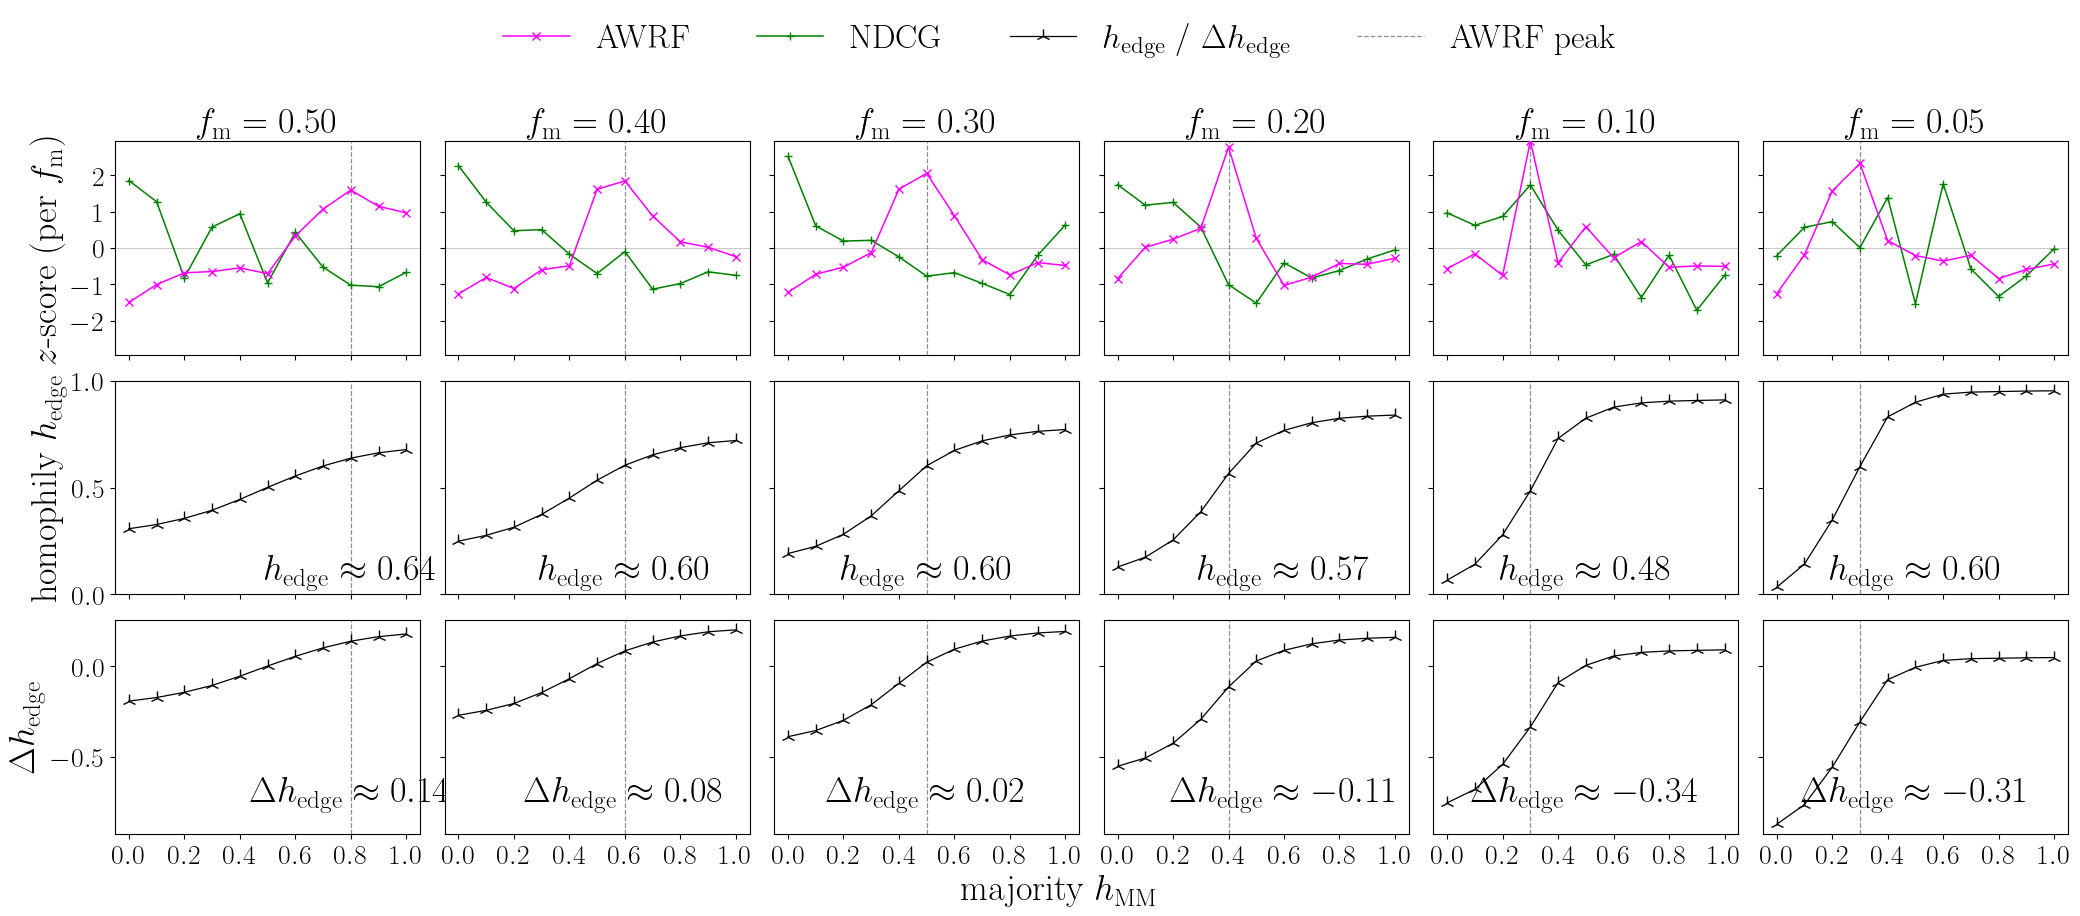

In [20]:
plot_zscores_with_homophily_rows(
    results = results,
    fm_values = sorted(
        fm_values,
        reverse = True
    ),
    h_MM_values = h_MM_values,
    h_mm_values = h_mm_values,
    fs = 20,
    key_ndkl = "reranked_AWRF",
    key_prec = "NDCG_at_k",
    label_ndkl = "AWRF",
    label_prec = "NDCG",
    key_hedge = "h_edge",
    key_delta = "delta_h_edge",
    # savepath = "../figures/dpah_zscores_awrf_ndcg_h_edge_delta_h_edge.pdf",
)